In [1]:
pip install kagglehub


Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uom190346a/ai-powered-job-market-insights")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Augus\.cache\kagglehub\datasets\uom190346a\ai-powered-job-market-insights\versions\1


In [3]:
import os
files = os.listdir(path)
print("Files in dataset folder:", files)


Files in dataset folder: ['ai_job_market_insights.csv']


In [4]:
import pandas as pd
csv_file = os.path.join(path, 'ai_job_market_insights.csv')  
job_market_data = pd.read_csv(csv_file)


print(job_market_data.head())


               Job_Title       Industry Company_Size   Location  \
0  Cybersecurity Analyst  Entertainment        Small      Dubai   
1   Marketing Specialist     Technology        Large  Singapore   
2          AI Researcher     Technology        Large  Singapore   
3          Sales Manager         Retail        Small     Berlin   
4  Cybersecurity Analyst  Entertainment        Small      Tokyo   

  AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD  \
0            Medium            High        UX/UI Design  111392.165243   
1            Medium            High           Marketing   93792.562466   
2            Medium            High        UX/UI Design  107170.263069   
3               Low            High  Project Management   93027.953758   
4               Low             Low          JavaScript   87752.922171   

  Remote_Friendly Job_Growth_Projection  
0             Yes                Growth  
1              No               Decline  
2             Yes         

In [5]:
import pandas as pd
import os

# Assuming you have already set the 'path' from kagglehub download
# List the files in the dataset directory to find the correct CSV file
files = os.listdir(path)
print("Files in dataset folder:", files)

# Load the dataset (replace 'file.csv' with the actual file name found)
csv_file = os.path.join(path, 'ai_job_market_insights.csv')  
job_market_data = pd.read_csv(csv_file)


print(job_market_data.columns)




Files in dataset folder: ['ai_job_market_insights.csv']
Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Job_Growth_Projection'],
      dtype='object')


In [6]:

mean_salary = job_market_data['Salary_USD'].mean()
print(f"The mean salary is: {mean_salary}")

std_salary = job_market_data['Salary_USD'].std()
print(f"The standard deviation is: {std_salary}")

The mean salary is: 91222.39097411344
The standard deviation is: 20504.291453477774


In [7]:
import pandas as pd
job_market_data = pd.read_csv(r'C:\Users\Augus\Desktop\ai_job_market_insights.csv')


mean_salary = job_market_data['Salary_USD'].mean()
print(f"The mean salary is: {mean_salary}")

std_salary = job_market_data['Salary_USD'].std()
print(f"The standard deviation is: {std_salary}")

The mean salary is: 91222.39097411344
The standard deviation is: 20504.291453477774


In [8]:
import kagglehub
import pandas as pd
from sklearn.preprocessing import StandardScaler


path = kagglehub.dataset_download("uom190346a/ai-powered-job-market-insights")
print("Path to dataset files:", path)


dataset_path = f"{path}/ai_job_market_insights.csv"  
job_market_data = pd.read_csv(dataset_path)

scaler = StandardScaler()
salary = job_market_data[['Salary_USD']]

job_market_data['Salary_USD_Scaled'] = scaler.fit_transform(salary)

print(job_market_data[['Salary_USD', 'Salary_USD_Scaled']].head())



Path to dataset files: C:\Users\Augus\.cache\kagglehub\datasets\uom190346a\ai-powered-job-market-insights\versions\1
      Salary_USD  Salary_USD_Scaled
0  111392.165243           0.984671
1   93792.562466           0.125474
2  107170.263069           0.778561
3   93027.953758           0.088146
4   87752.922171          -0.169376


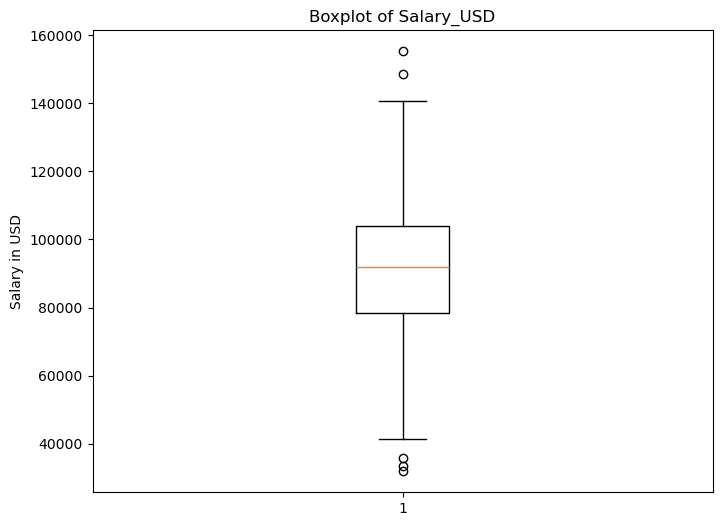

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(job_market_data['Salary_USD'])
plt.title('Boxplot of Salary_USD')
plt.ylabel('Salary in USD')
plt.show()


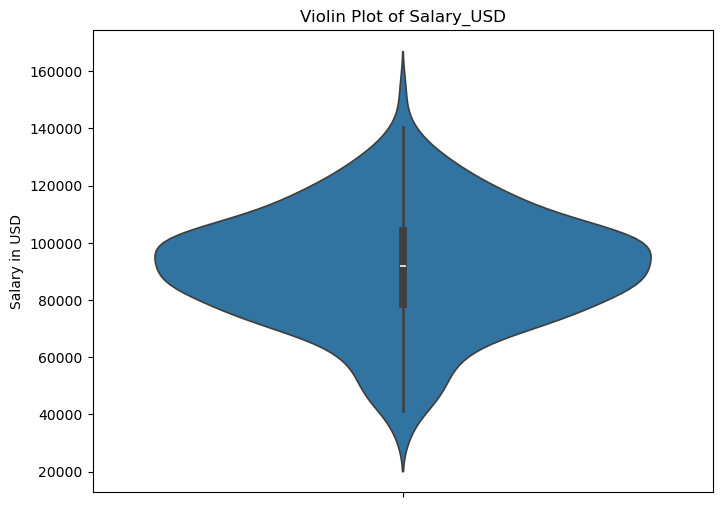

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a violin plot of the Salary_USD column
plt.figure(figsize=(8, 6))
sns.violinplot(y=job_market_data['Salary_USD'])
plt.title('Violin Plot of Salary_USD')
plt.ylabel('Salary in USD')
plt.show()



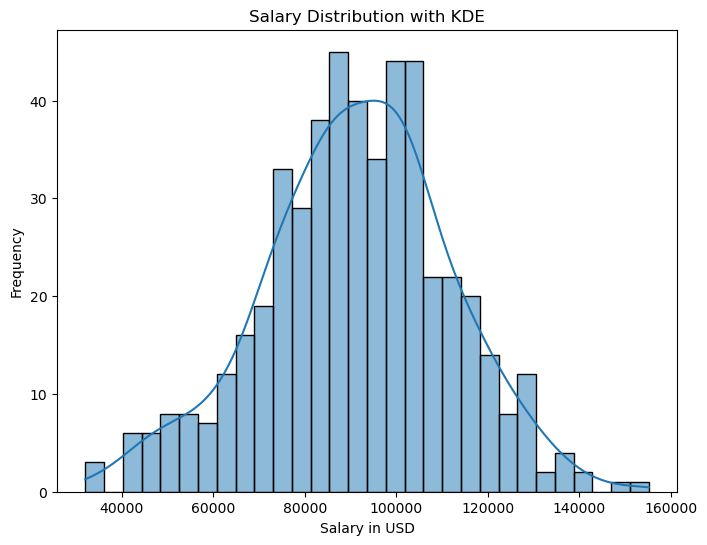

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.histplot(job_market_data['Salary_USD'], kde=True, bins=30)
plt.title('Salary Distribution with KDE')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()


In [12]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = job_market_data['Salary_USD'].quantile(0.25)
Q3 = job_market_data['Salary_USD'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = job_market_data[(job_market_data['Salary_USD'] < lower_bound) | (job_market_data['Salary_USD'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print(outliers[['Salary_USD']])


Number of outliers: 5
        Salary_USD
182   31969.526346
289  148467.112346
384   33601.381360
420  155209.821614
425   35963.297317


In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
job_market_data['AI_Adoption_Level_Encoded'] = job_market_data['AI_Adoption_Level'].map(risk_mapping)

risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
job_market_data['Automation_Risk_Encoded'] = job_market_data['Automation_Risk'].map(risk_mapping)


print(job_market_data[['AI_Adoption_Level', 'AI_Adoption_Level_Encoded', 'Automation_Risk', 'Automation_Risk_Encoded']].head(10))


  AI_Adoption_Level  AI_Adoption_Level_Encoded Automation_Risk  \
0            Medium                          1            High   
1            Medium                          1            High   
2            Medium                          1            High   
3               Low                          0            High   
4               Low                          0             Low   
5            Medium                          1          Medium   
6               Low                          0            High   
7            Medium                          1             Low   
8              High                          2             Low   
9              High                          2             Low   

   Automation_Risk_Encoded  
0                        2  
1                        2  
2                        2  
3                        2  
4                        0  
5                        1  
6                        2  
7                        0  
8           

In [14]:

grouped_data = job_market_data.groupby(['Company_Size', 'Automation_Risk']).size().unstack()

print(grouped_data)


Automation_Risk  High  Low  Medium
Company_Size                      
Large              58   42      66
Medium             52   63      48
Small              59   53      59


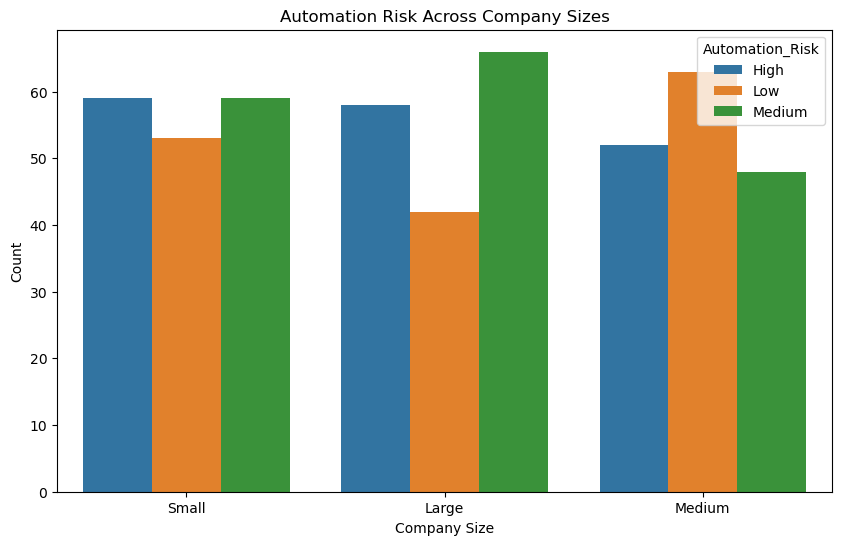

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=job_market_data, x='Company_Size', hue='Automation_Risk')
plt.title('Automation Risk Across Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.show()


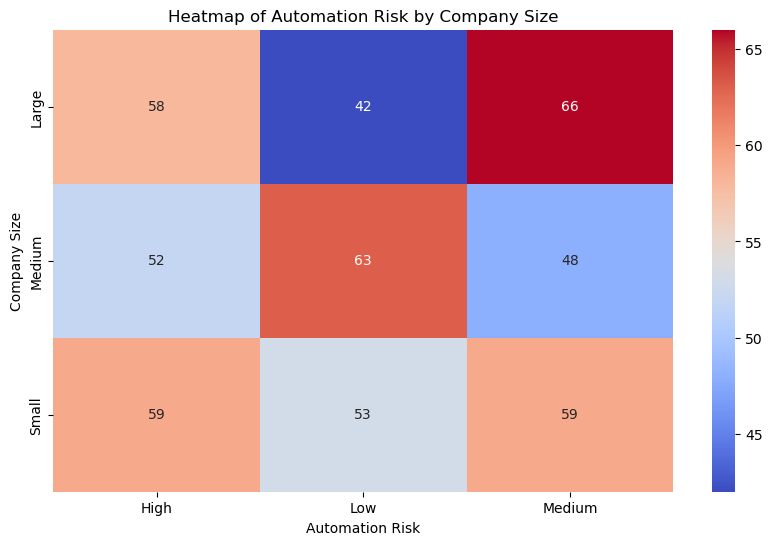

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_data, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Automation Risk by Company Size')
plt.xlabel('Automation Risk')
plt.ylabel('Company Size')
plt.show()


In [18]:
print(job_market_data.columns)

Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Job_Growth_Projection', 'Salary_USD_Scaled',
       'AI_Adoption_Level_Encoded', 'Automation_Risk_Encoded'],
      dtype='object')
